In [5]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Activation, Conv1D, AveragePooling1D, UpSampling1D, Conv2DTranspose
from keras.utils import *
from keras.optimizers import *
import keras.backend as K

In [6]:
def Conv1DTranspose(input_tensor, filters, kernel_size, strides=2, padding='same'):
    x = Lambda(lambda x: K.expand_dims(x, axis=2))(input_tensor)
    x = Conv2DTranspose(filters=filters, kernel_size=(kernel_size, 1), strides=(strides, 1), padding=padding)(x)
    x = Lambda(lambda x: K.squeeze(x, axis=2))(x)
    return x

In [8]:
import scipy.io
data = scipy.io.loadmat('data_for_cnn.mat')
X = data['ecg_in_window']
data = scipy.io.loadmat('class_label.mat')
Y = data['label']
Y = Y.T
# Holdout Method
train_size = 0.8
X_train = X[0: int(train_size * X.shape[0])]
y_train = Y[0: int(train_size * Y.shape[0])]
x_test = X[int(train_size * X.shape[0]):]
Y_test = Y[int(train_size * X.shape[0]):]

X_valid=x_test[:100]
X_test=c[100:]
y_valid=Y_test[:100]
y_test=Y_test[100:]
X_train = X_train.reshape(-1, 1000,1)
X_valid=X_valid.reshape(-1,1000,1)
X_test  = X_test.reshape(-1, 1000, 1)
y_train = y_train.reshape(-1, 1, 1)
y_valid=y_valid.reshape(-1,1,1,)
y_test = y_test.reshape(-1, 1, 1)

NameError: name 'c' is not defined

In [41]:
i=Input(shape=(1000,1))
c1=Conv1D(10, 11 , strides=1,input_shape=(1000,1))(i)
p1=AveragePooling1D(pool_size=10)(c1)
d1=(Dense(16))(p1)
u1=UpSampling1D(size=10)(d1)
x = keras.layers.Lambda(lambda x: K.expand_dims(x, axis=2))(u1)
x = Conv2DTranspose(filters=1, kernel_size=(11, 1), strides=(1, 1))(x)
x = keras.layers.Lambda(lambda x: K.squeeze(x, axis=2))(x)
model = Model(inputs=i, outputs=x)
model.compile(optimizer=Adam(lr=0.01),loss='mean_squared_error')
model_history=model.fit(X_train,X_train,epochs=500,batch_size=100,validation_data=(X_valid,X_valid))
model.summary()

Train on 800 samples, validate on 100 samples
Epoch 1/500
800/800 [==============================] - 3s 3ms/step - loss: 21401.9272 - val_loss: 20073.6992
Epoch 2/500
800/800 [==============================] - 1s 893us/step - loss: 19769.4727 - val_loss: 19352.2617
Epoch 3/500
800/800 [==============================] - 1s 878us/step - loss: 19267.8955 - val_loss: 18858.6074
Epoch 4/500
800/800 [==============================] - 1s 900us/step - loss: 18963.0847 - val_loss: 18625.2754
Epoch 5/500
800/800 [==============================] - 1s 966us/step - loss: 18695.7490 - val_loss: 18345.4453
Epoch 6/500
800/800 [==============================] - 1s 1ms/step - loss: 18357.5134 - val_loss: 17954.9570
Epoch 7/500
800/800 [==============================] - 1s 957us/step - loss: 17941.5891 - val_loss: 17511.7520
Epoch 8/500
800/800 [==============================] - 1s 1ms/step - loss: 17484.9797 - val_loss: 17044.9375
Epoch 9/500
800/800 [==============================] - 1s 2ms/step - los

800/800 [==============================] - 1s 952us/step - loss: 5809.7831 - val_loss: 5776.6802
Epoch 151/500
800/800 [==============================] - 1s 936us/step - loss: 5809.8394 - val_loss: 5777.0933
Epoch 152/500
800/800 [==============================] - 1s 940us/step - loss: 5809.6960 - val_loss: 5776.4126
Epoch 153/500
800/800 [==============================] - 1s 966us/step - loss: 5809.4921 - val_loss: 5776.9277
Epoch 154/500
800/800 [==============================] - 1s 894us/step - loss: 5809.3011 - val_loss: 5776.8130
Epoch 155/500
800/800 [==============================] - 1s 917us/step - loss: 5809.2047 - val_loss: 5776.9683
Epoch 156/500
800/800 [==============================] - 1s 904us/step - loss: 5809.2905 - val_loss: 5776.7642
Epoch 157/500
800/800 [==============================] - 1s 1ms/step - loss: 5809.4076 - val_loss: 5776.5894
Epoch 158/500
800/800 [==============================] - 1s 959us/step - loss: 5809.1020 - val_loss: 5776.0049
Epoch 159/500
800

Epoch 225/500
800/800 [==============================] - 1s 800us/step - loss: 5799.4077 - val_loss: 5766.5225
Epoch 226/500
800/800 [==============================] - 1s 797us/step - loss: 5799.0555 - val_loss: 5766.5107
Epoch 227/500
800/800 [==============================] - 1s 781us/step - loss: 5798.7054 - val_loss: 5767.2100
Epoch 228/500
800/800 [==============================] - 1s 807us/step - loss: 5799.0231 - val_loss: 5766.3423
Epoch 229/500
800/800 [==============================] - 1s 821us/step - loss: 5799.1638 - val_loss: 5765.7227
Epoch 230/500
800/800 [==============================] - 1s 779us/step - loss: 5798.5248 - val_loss: 5765.3496
Epoch 231/500
800/800 [==============================] - 1s 768us/step - loss: 5798.3119 - val_loss: 5766.0537
Epoch 232/500
800/800 [==============================] - 1s 880us/step - loss: 5798.5167 - val_loss: 5766.3389
Epoch 233/500
800/800 [==============================] - 1s 847us/step - loss: 5799.0712 - val_loss: 5766.1602
E

Epoch 373/500
800/800 [==============================] - 1s 787us/step - loss: 5783.7669 - val_loss: 5751.3877
Epoch 374/500
800/800 [==============================] - 1s 783us/step - loss: 5782.9496 - val_loss: 5750.6348
Epoch 375/500
800/800 [==============================] - 1s 768us/step - loss: 5782.9803 - val_loss: 5751.5039
Epoch 376/500
800/800 [==============================] - ETA: 0s - loss: 5792.17 - 1s 802us/step - loss: 5783.5309 - val_loss: 5752.9590
Epoch 377/500
800/800 [==============================] - 1s 787us/step - loss: 5783.8513 - val_loss: 5751.4463
Epoch 378/500
800/800 [==============================] - 1s 787us/step - loss: 5782.7899 - val_loss: 5750.8267
Epoch 379/500
800/800 [==============================] - 1s 792us/step - loss: 5782.5269 - val_loss: 5750.5664
Epoch 380/500
800/800 [==============================] - 1s 795us/step - loss: 5782.1568 - val_loss: 5751.1221
Epoch 381/500
800/800 [==============================] - 1s 777us/step - loss: 5782.43

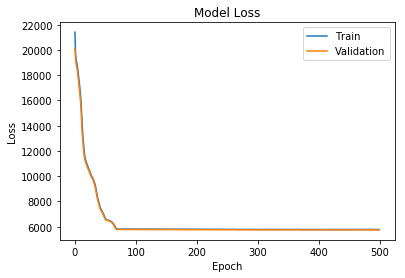

In [42]:
# plt.plot(model_history.history['acc'])
# plt.plot(model_history.history['val_acc'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')
# plt.show()
# # plt.savefig('accHigh.svg')

# # Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# plt.savefig('lossHigh.svg')

100/100 [==============================] - 0s 499us/step


5738.120234375

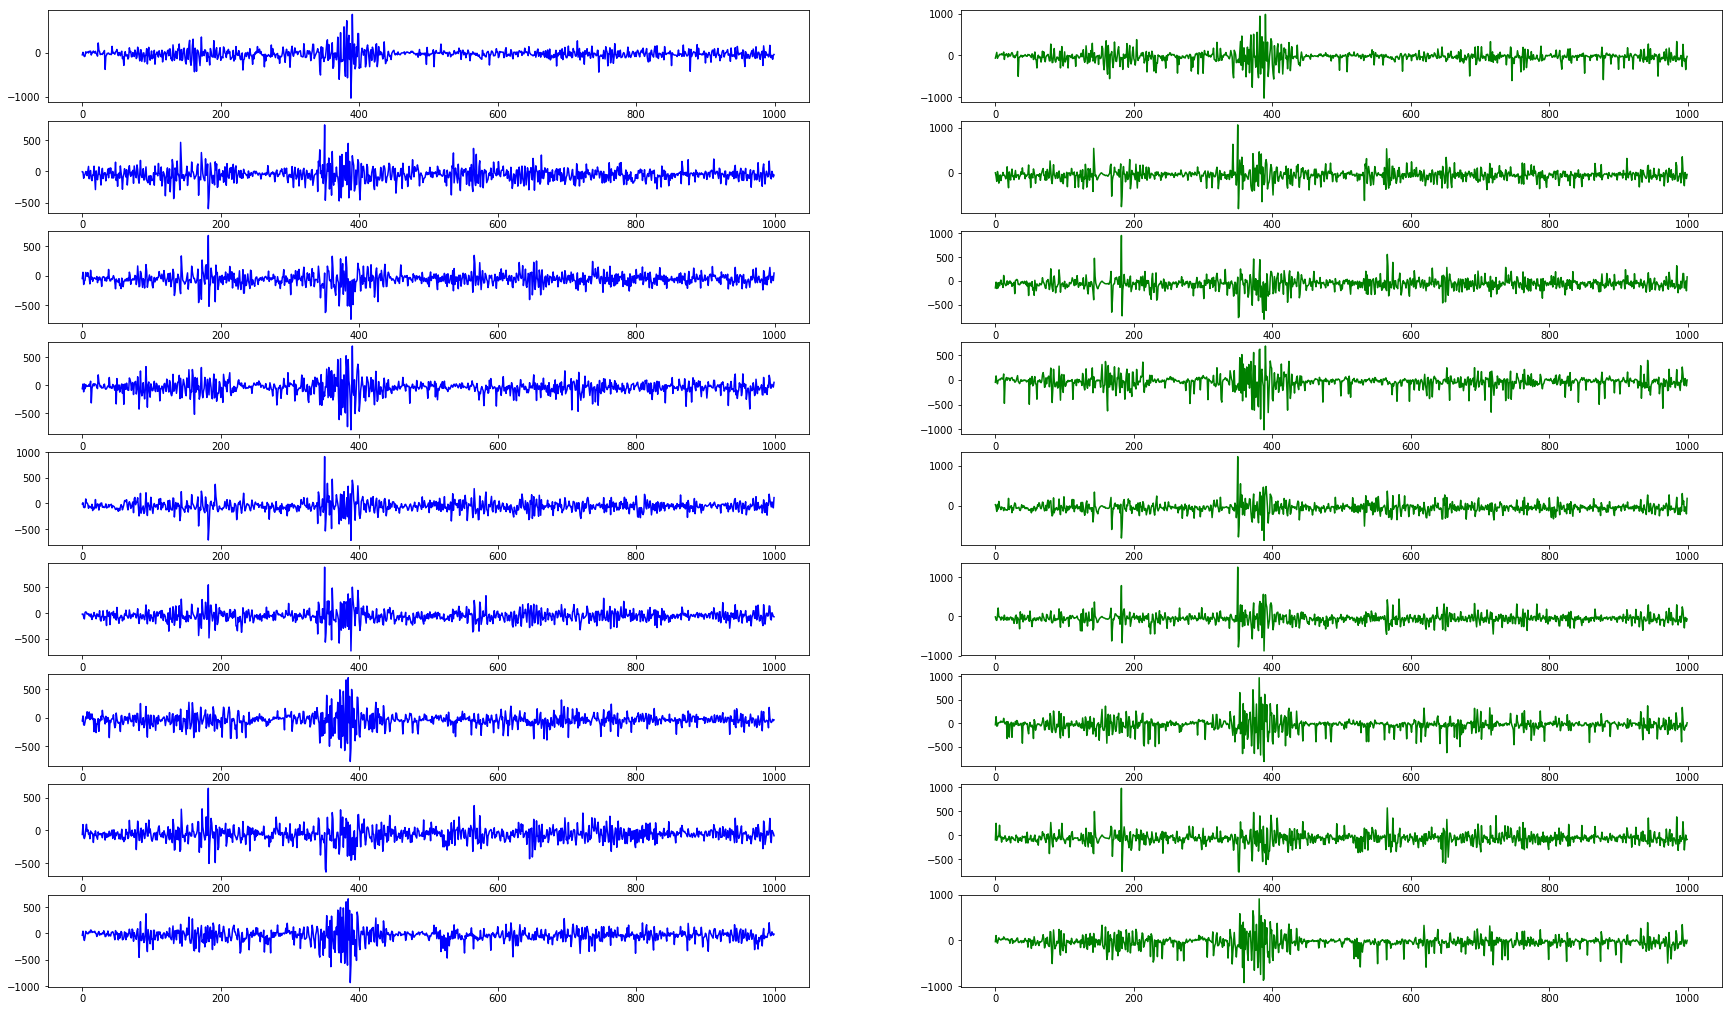

In [47]:
X_pred= model.predict(X_test)
n=10
plt.figure(figsize=(30,20))
for i in range(1,n):
    plt.subplot(n,2,2*i-1)
    plt.plot(X_pred[i].reshape(-1,1),color='blue')
#     plt.ylim([-1,1])
    plt.subplot(n,2,2*i)
    plt.plot(X_test[i],color='green')
#     plt.ylim([-1,1])
plt.show()
# X_pred = model.predict(X_test)
# y_p=[0 for i in range(100)]
# for i in range (100):
#     if(y_pred[i]>0.5):
#         y_p[i]=1
# plt.plot(X_pred[3].reshape(-1,1))

In [70]:
a=0
for i in range(100):    
        if y_test[i] == y_p[i]:
            a=a+1 
a/100            

0.95

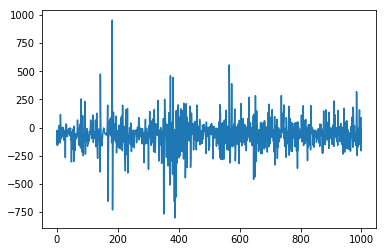

In [31]:
plt.plot(X_test[3])

In [11]:
print("80 - 20 Holdout Approach Accuracy :- ")
print("\n86.44212000122109%")

80 - 20 Holdout Approach Accuracy :- 

86.44212000122109%
